erge

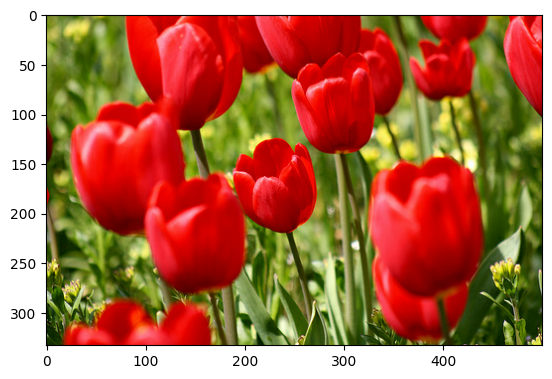

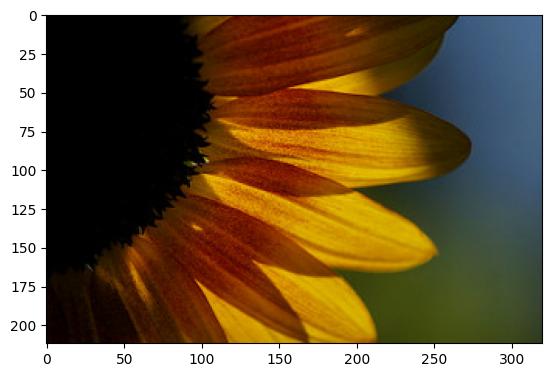

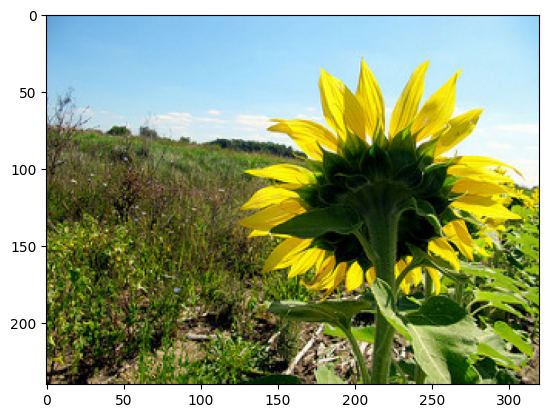

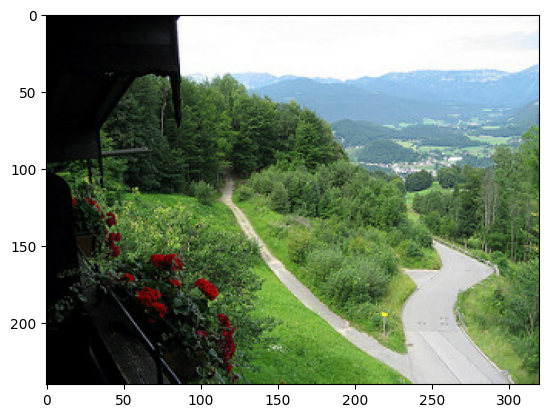

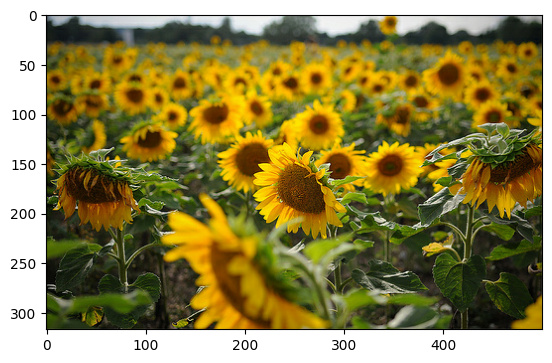

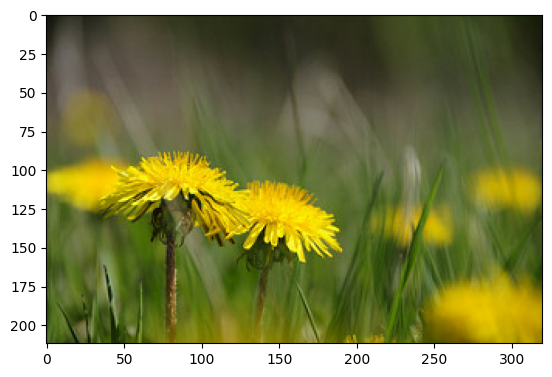

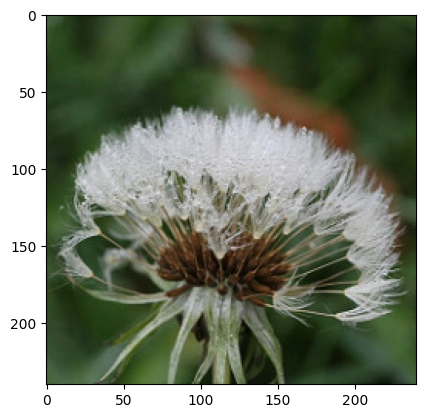

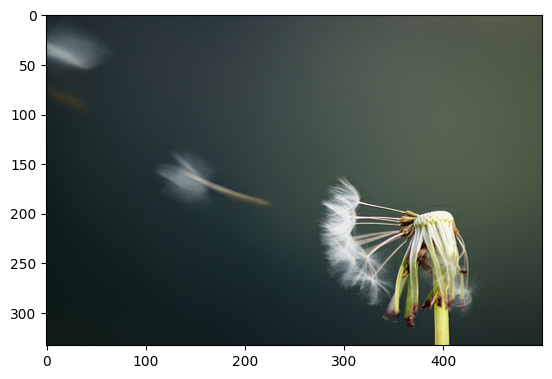

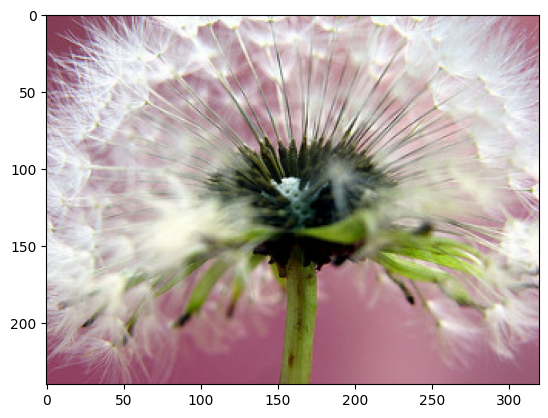

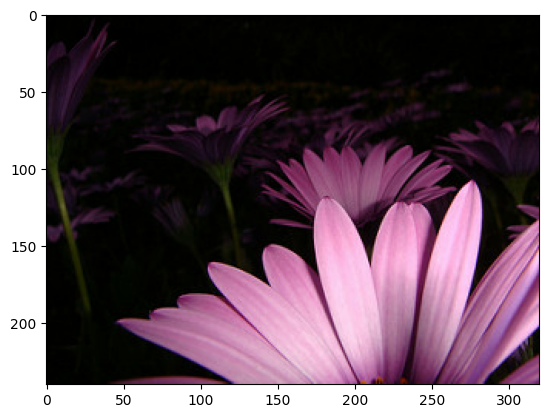

In [25]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# Load a dataset (example: MNIST)
dataset = tfds.load('tf_flowers', split='train')

# Iterate over images
for dict in dataset.take(5):  # Taking first 10 images for example
    image = dict['image']
    plt.imshow(image, cmap='gray')
    plt.show()